# Dataset initialization

In [3]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '../'))

In [5]:
import albumentations as A
import albumentations.pytorch.transforms

from detr.datasets.coco_subset import CocoSubset

In [6]:
transforms = A.Compose([
    A.HorizontalFlip(always_apply=True),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    A.pytorch.transforms.ToTensorV2(),
], bbox_params=A.BboxParams(format='coco', label_fields=['class_labels']))

In [7]:
train_dataset = CocoSubset('../data/coco/', ['cat', 'dog'], transforms=transforms)

# Visualization

In [8]:
import torch
import matplotlib.pyplot as plt

from detr.utils import data_utils, box_ops

In [9]:
def visualize_image(image,
                    labels,
                    figsize=(10, 10)):

    if isinstance(image, torch.Tensor):
        image = data_utils.denormalize_tensor_image(image)
        
    bboxes = labels['bboxes']
    
    if isinstance(bboxes[0], torch.Tensor):
        img_w = image.width
        img_h = image.height
        bboxes = box_ops.convert_bboxes_format(bboxes, 'yolo', 'coco', img_h, img_w)
    
    plt.figure(figsize=figsize)
    plt.imshow(image)
    ax = plt.gca()
    for bbox in bboxes:
        x, y, w, h = bbox
        ax.add_patch(plt.Rectangle((x, y), w, h, fill=False, color='r', linewidth=4))

In [10]:
idxs = iter(range(len(train_dataset)))

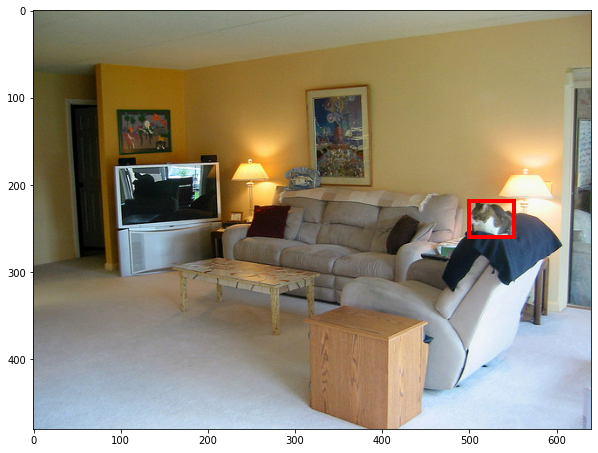

In [11]:
img, labels = train_dataset[next(idxs)]
visualize_image(img, labels)